In [1]:
%matplotlib inline

In [2]:
import sys                                                                                                                                                                                                                                                                       
from mpi4py import MPI

In [3]:
sys.path.append("/home/jsoishi/hg-projects/eigentools")

In [4]:
from eigentools import Eigenproblem, CriticalFinder                                                                                                                                                                                                                              
import time                                                                                                                                                                                                                                                                      
import dedalus.public as de                                                                                                                                                                                                                                                      
import numpy as np                                                                                                                                                                                                                                                               
import matplotlib.pylab as plt                                                                                                                                                                                                                                                   
                                                                                                                                                                                                                                                                                 
comm = MPI.COMM_WORLD

In [5]:
# Define the MRI problem in Dedalus:                                                                                                                                                                                                                                             
                                                                                                                                                                                                                                                                                 
x = de.Chebyshev('x',128)                                                                                                                                                                                                                                                        
d = de.Domain([x],comm=MPI.COMM_SELF)                                                                                                                                                                                                                                            
                                                                                                                                                                                                                                                                                 
mri = de.EVP(d,['psi','u', 'A', 'B', 'psix', 'psixx', 'psixxx', 'ux', 'Ax', 'Bx'],'sigma')                                                                                                                                                                                       
                                                                                                                                                                                                                                                                                 
                                                                                                                                                                                                                                                                                 
Rm = 1/1.0333333333333334
Pm = 0.001
mri.parameters['q'] = 1.5
mri.parameters['beta'] = 25.0
mri.parameters['iR'] = Pm/Rm
mri.parameters['iRm'] = 1./Rm
mri.parameters['Q'] = 1.0333333333333334                                                                                                                                                                                                                                                    

mri.add_equation("sigma*psixx - Q**2*sigma*psi - iR*dx(psixxx) + 2*iR*Q**2*psixx - iR*Q**4*psi - 2*1j*Q*u - (2/beta)*1j*Q*dx(Ax) + (2/beta)*Q**3*1j*A = 0")                                                                                                                      
mri.add_equation("sigma*u - iR*dx(ux) + iR*Q**2*u - (q - 2)*1j*Q*psi - (2/beta)*1j*Q*B = 0")                                                                                                                                                                                     
mri.add_equation("sigma*A - iRm*dx(Ax) + iRm*Q**2*A - 1j*Q*psi = 0")                                                                                                                                                                                                             
mri.add_equation("sigma*B - iRm*dx(Bx) + iRm*Q**2*B - 1j*Q*u + q*1j*Q*A = 0")                                                                                                                                                                                                    
mri.add_equation("dx(psi) - psix = 0")                                                                                                                                                                                                                                           
mri.add_equation("dx(psix) - psixx = 0")                                                                                                                                                                                                                                         
mri.add_equation("dx(psixx) - psixxx = 0")                                                                                                                                                                                                                                       
mri.add_equation("dx(u) - ux = 0")                                                                                                                                                                                                                                               
mri.add_equation("dx(A) - Ax = 0")                                                                                                                                                                                                                                               
mri.add_equation("dx(B) - Bx = 0")

mri.add_bc("left(u) = 0")                                                                                                                                                                                                                                                        
mri.add_bc("right(u) = 0")                                                                                                                                                                                                                                                       
mri.add_bc("left(psi) = 0")                                                                                                                                                                                                                                                      
mri.add_bc("right(psi) = 0")                                                                                                                                                                                                                                                     
mri.add_bc("left(A) = 0")                                                                                                                                                                                                                                                        
mri.add_bc("right(A) = 0")                                                                                                                                                                                                                                                       
mri.add_bc("left(psix) = 0")                                                                                                                                                                                                                                                     
mri.add_bc("right(psix) = 0")                                                                                                                                                                                                                                                    
mri.add_bc("left(Bx) = 0")                                                                                                                                                                                                                                                       
mri.add_bc("right(Bx) = 0")                                                                                                                                                                                                                                                      

# create an Eigenproblem object                                                                                                                                                                                                                                                  
EP = Eigenproblem(mri)                                                                                                                                                                                                                                                           
                                                                                                                                                                                                                                                                   


DEBUG:domain:Global coeff shape: [128]
DEBUG:distributor:Mesh: []
INFO:problems:Solving EVP with homogeneity tolerance of 1.000e-10


2016-02-23 17:28:29,796 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10


DEBUG:problems:Parsing Eqn 0
DEBUG:problems:  Condition: True
DEBUG:problems:  LHS string form: sigma*psixx - Q**2*sigma*psi - iR*dx(psixxx) + 2*iR*Q**2*psixx - iR*Q**4*psi - 2*1j*Q*u - (2/beta)*1j*Q*dx(Ax) + (2/beta)*Q**3*1j*A
DEBUG:problems:  RHS string form: 0
DEBUG:problems:  LHS object form: (((((((sigma*psixx) + (-1*(((Q**2)*sigma)*psi))) + (-1*(iR*dx(psixxx)))) + (((2*iR)*(Q**2))*psixx)) + (-1*((iR*(Q**4))*psi))) + (-1*((2j*Q)*u))) + (-1*((((2*(beta**-1))*1j)*Q)*dx(Ax)))) + ((((2*(beta**-1))*(Q**3))*1j)*A)
DEBUG:problems:  RHS object form: 0
DEBUG:problems:  M linear form: psixx + ((-1*(Q**2))*psi)
DEBUG:problems:  L linear form: ((((((-1*iR)*dx(psixxx)) + (((2*iR)*(Q**2))*psixx)) + ((-1*(iR*(Q**4)))*psi)) + ((-1*(2j*Q))*u)) + ((-1*(((2*(beta**-1))*1j)*Q))*dx(Ax))) + ((((2*(beta**-1))*(Q**3))*1j)*A)
DEBUG:problems:Parsing Eqn 1
DEBUG:problems:  Condition: True
DEBUG:problems:  LHS string form: sigma*u - iR*dx(ux) + iR*Q**2*u - (q - 2)*1j*Q*psi - (2/beta)*1j*Q*B
DEBUG:problems:  

In [6]:
gr = EP.growth_rate({})
print("MRI corrected growth rate = {0:10.5e}".format(gr))

/home/jsoishi/tmp/dedalus-exp/lib/python3.4/site-packages/scipy/linalg/decomp.py:55: RuntimeWarning: divide by zero encountered in true_divide
  w = alpha / beta
/home/jsoishi/tmp/dedalus-exp/lib/python3.4/site-packages/scipy/linalg/decomp.py:55: RuntimeWarning: invalid value encountered in true_divide
  w = alpha / beta
DEBUG:domain:Global coeff shape: [192]
DEBUG:distributor:Mesh: []
INFO:problems:Solving EVP with homogeneity tolerance of 1.000e-10


2016-02-23 17:30:07,923 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10


DEBUG:problems:Parsing Eqn 0
DEBUG:problems:  Condition: True
DEBUG:problems:  LHS string form: sigma*psixx - Q**2*sigma*psi - iR*dx(psixxx) + 2*iR*Q**2*psixx - iR*Q**4*psi - 2*1j*Q*u - (2/beta)*1j*Q*dx(Ax) + (2/beta)*Q**3*1j*A
DEBUG:problems:  RHS string form: 0
DEBUG:problems:  LHS object form: (((((((sigma*psixx) + (-1*(((Q**2)*sigma)*psi))) + (-1*(iR*dx(psixxx)))) + (((2*iR)*(Q**2))*psixx)) + (-1*((iR*(Q**4))*psi))) + (-1*((2j*Q)*u))) + (-1*((((2*(beta**-1))*1j)*Q)*dx(Ax)))) + ((((2*(beta**-1))*(Q**3))*1j)*A)
DEBUG:problems:  RHS object form: 0
DEBUG:problems:  M linear form: psixx + ((-1*(Q**2))*psi)
DEBUG:problems:  L linear form: ((((((-1*iR)*dx(psixxx)) + (((2*iR)*(Q**2))*psixx)) + ((-1*(iR*(Q**4)))*psi)) + ((-1*(2j*Q))*u)) + ((-1*(((2*(beta**-1))*1j)*Q))*dx(Ax))) + ((((2*(beta**-1))*(Q**3))*1j)*A)
DEBUG:problems:Parsing Eqn 1
DEBUG:problems:  Condition: True
DEBUG:problems:  LHS string form: sigma*u - iR*dx(ux) + iR*Q**2*u - (q - 2)*1j*Q*psi - (2/beta)*1j*Q*B
DEBUG:problems:  

Eigenvalue solver failed to converge for parameters {}
MRI corrected growth rate =        nan


In [7]:
import numpy.linalg as LA

In [8]:
def get_L_M(solver):
    p = solver.pencils[0]
    p.build_matrices(solver.problem,['M','L'])
    L = p.L.todense()
    M = p.M.todense()
    
    return L, M

In [9]:
def find_cond_num(solver):
    L, M = get_L_M(solver)
    
    return LA.cond(L)

In [10]:
find_cond_num(EP.solver)

497569.47513864149

In [11]:
find_cond_num(EP.EVP_hires.build_solver())

DEBUG:solvers:Beginning EVP instantiation
DEBUG:solvers:Finished EVP instantiation


748288.60954851354

In [12]:
L, M = get_L_M(EP.solver)

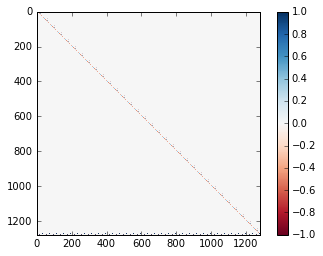

In [13]:
plt.imshow(L.real,vmin=-1,vmax=1,cmap='RdBu')
plt.colorbar()

In [14]:
LA.det(L+M)

/home/jsoishi/tmp/dedalus-exp/lib/python3.4/site-packages/numpy/linalg/linalg.py:1776: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)
/home/jsoishi/tmp/dedalus-exp/lib/python3.4/site-packages/numpy/linalg/linalg.py:1776: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


(inf+nan*j)

In [15]:
M.real.max()

1.0

In [20]:
%load_ext Cython

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


from http://www.netlib.org/lapack/explore-html/db/d55/group__complex16_g_eeigen.html#gaad769423756706f1186027c9dd7615e4

```
subroutine zggevx	(	character 	BALANC,
character 	JOBVL,
character 	JOBVR,
character 	SENSE,
integer 	N,
complex*16, dimension( lda, * ) 	A,
integer 	LDA,
complex*16, dimension( ldb, * ) 	B,
integer 	LDB,
complex*16, dimension( * ) 	ALPHA,
complex*16, dimension( * ) 	BETA,
complex*16, dimension( ldvl, * ) 	VL,
integer 	LDVL,
complex*16, dimension( ldvr, * ) 	VR,
integer 	LDVR,
integer 	ILO,
integer 	IHI,
double precision, dimension( * ) 	LSCALE,
double precision, dimension( * ) 	RSCALE,
double precision 	ABNRM,
double precision 	BBNRM,
double precision, dimension( * ) 	RCONDE,
double precision, dimension( * ) 	RCONDV,
complex*16, dimension( * ) 	WORK,
integer 	LWORK,
double precision, dimension( * ) 	RWORK,
integer, dimension( * ) 	IWORK,
logical, dimension( * ) 	BWORK,
integer 	INFO 
)
```

In [17]:
%%cython
import numpy as np
cimport numpy as np
cimport scipy.linalg.cython_lapack as lapack 

DTYPE = np.complex
ctypedef np.complex_t DTYPE_t
ctypedef np.float_t DTYPE_dp
ctypedef np.int_t DTYPE_int

def baleig(np.ndarray[DTYPE_t, ndim=2] A, np.ndarray[DTYPE_t, ndim=2] B):
    #need to check that A, B are complex, square, and the same size!
    
    
    cdef int N, LDA, LDB, LDVL, LDVR, ILO, IHI, LWORK, INFO
    cdef complex VL # we do not solve for this
    cdef float ABNRM, BBNRM
    N = A.shape[0]
    LDA = A.shape[1]
    LDB = B.shape[1]

    if LDA != LDB:
        raise ValueError("A and B must be the same size")
    if N != LDA:
        raise ValueError("A must be square!")
    if N != LDB:
        raise ValueError("B must be square!")
    
    cdef np.ndarray[DTYPE_t, ndim=1] ALPHA = np.zeros([N,],dtype=DTYPE)
    cdef np.ndarray[DTYPE_t, ndim=1] BETA = np.zeros([N,],dtype=DTYPE)
    
    cdef np.ndarray[DTYPE_dp, ndim=1] RCONDE = np.zeros([N,],dtype=np.float)
    cdef np.ndarray[DTYPE_dp, ndim=1] RCONDV = np.zeros([N,],dtype=np.float)
    
    cdef np.ndarray[DTYPE_t, ndim=1] VR = np.zeros([N,],dtype=DTYPE)
    cdef np.ndarray[DTYPE_dp, ndim=1] LSCALE = np.zeros([N,],dtype=np.float)
    cdef np.ndarray[DTYPE_dp, ndim=1] RSCALE = np.zeros([N,],dtype=np.float)

    cdef char BALANC, JOBVL, JOBVR, SENSE
    
    # hard code balance option
    BALANC='B'
    JOBVL='N'
    JOBVR='V'
    SENSE='B'
    
    #The dimension of the array WORK. LWORK >= max(1,2*N).
    #      If SENSE = 'E', LWORK >= max(1,4*N).
    #      If SENSE = 'V' or 'B', LWORK >= max(1,2*N*N+2*N).
    LWORK = np.max(1,2*N*N+2*N)
    cdef np.ndarray[DTYPE_t, ndim=1] WORK = np.empty([LWORK,],dtype=DTYPE)
    
    #          lrwork must be at least max(1,6*N) if BALANC = 'S' or 'B',
    #      and at least max(1,2*N) otherwise.
    #      Real workspace.
    cdef np.ndarray[DTYPE_dp, ndim=1] RWORK = np.empty([6*N,],dtype=np.float)
    cdef np.ndarray[DTYPE_int,ndim=1] IWORK = np.empty([N+2,],dtype=np.int)
    
    
    
    lapack.zggevx(&BALANC, &JOBVL, &JOBVR, &SENSE, &N, <complex *> np.PyArray_DATA(A), 
                  &LDA, <complex *> np.PyArray_DATA(B), &LDB, <complex *> np.PyArray_DATA(ALPHA),
                  <complex *> np.PyArray_DATA(BETA), &VL, <complex *> np.PyArray_DATA(VR),
                  &LVDR, &ILO, &IHI, <double *> np.PyArray_DATA(LSCALE),
                  <double *> np.PyArray_DATA(RSCALE), &ABNRM, &BBNRM,
                  <double *> np.PyArray_DATA(RCONDE), <double *> np.PyArray_DATA(RCONDV), 
                  <complex *> np.PyArray_DATA(WORK), &LWORK,
                  <double *> np.PyArray_DATA(RWORK), <int *> np.PyArray_DATA(IWORK),
                 )
                  


Error compiling Cython file:
------------------------------------------------------------
...
    JOBVL='N'
    JOBVR='V'
    SENSE='B'
    lapack.zggevx(&BALANC, &JOBVL, &JOBVR, &SENSE, &N, <complex *> np.PyArray_DATA(A), 
                  &LDA, <complex *> np.PyArray_DATA(B), &LDB, 
^
------------------------------------------------------------

/home/jsoishi/.cache/ipython/cython/_cython_magic_eed23c72ec9727f8f01b6cdc58e477a3.pyx:35:0: Expected an identifier or literal


In [18]:
%%cython
import numpy as np
cimport numpy as cnp
cimport scipy.linalg.cython_lapack as lapack 
DTYPE = np.float
ctypedef np.float_t DTYPE_t

def dgbsv_test(np.ndarray[DTYPE_t, ndim=2] A):
    cdef int imax = A.shape[0]
    cdef int jmax = A.shape[1]
    cdef int N, KL, KU, LDAB, IPIV, INFO
    cdef np.ndarray B = np.zeros([imax,], dtype=DTYPE)
    
    N  = A.shape[1]
    LDAB = A.shape[0]
    lapack.dgbsv(N,KL,KU,1,A,LDAB, IPIV, <double *> cnp.PyArray_DATA(B), N, <double *> cnp.PyArray_DATA(A),INFO)
    
    return B


Error compiling Cython file:
------------------------------------------------------------
...
import numpy as np
cimport numpy as cnp
cimport scipy.linalg.cython_lapack as lapack 
DTYPE = np.float
ctypedef np.float_t DTYPE_t
        ^
------------------------------------------------------------

/home/jsoishi/.cache/ipython/cython/_cython_magic_d7e04dcca85999a76d237006786b806c.pyx:5:9: 'np' is not a cimported module

Error compiling Cython file:
------------------------------------------------------------
...
cimport numpy as cnp
cimport scipy.linalg.cython_lapack as lapack 
DTYPE = np.float
ctypedef np.float_t DTYPE_t

def dgbsv_test(np.ndarray[DTYPE_t, ndim=2] A):
              ^
------------------------------------------------------------

/home/jsoishi/.cache/ipython/cython/_cython_magic_d7e04dcca85999a76d237006786b806c.pyx:7:15: 'np' is not a cimported module

Error compiling Cython file:
------------------------------------------------------------
...

def dgbsv_test(np.ndarray[

In [19]:
A = np.zeros((10,10),dtype='float')

dgbsv_test(A)

NameError: name 'dgbsv_test' is not defined

In [ ]:
A.